<a href="https://colab.research.google.com/github/arnaldojr/cognitivecomputing/blob/master/material/aulas/IA/lab02/ml-classificador-digito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objetivos

  - Conhecer algoritmos de classificação, SVM e Randon Forest;


## Classificação de digitos 0-9

Agora aplicamos os modelos a um dataset mais complexo: reconhecimento de dígitos manuscritos (0-9), com 1797 amostras e 64 features (pixels 8x8).


![](digits.png)







In [1]:
from sklearn.datasets import load_digits

digits = load_digits()

print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64)), 'target': array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_

In [2]:
# conhecendo todos os atributos carregados em digits
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
# definindo X e y 
X = digits.data
y =  digits.target

In [4]:
digits.target


array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

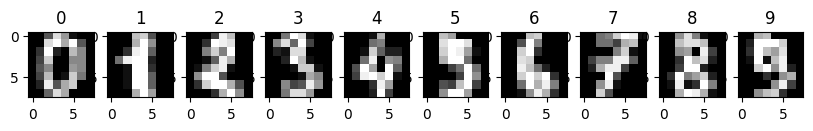

In [5]:
# Visualizando os primeiros 10 dígitos do dataset
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 10, figsize=(10,3))

for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(digits.target[i])


In [6]:
from sklearn.model_selection import train_test_split
# Separando os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(f"Formato das tabelas de dados de treino {X_train.shape} e teste {y_train.shape}")

Formato das tabelas de dados de treino (1437, 64) e teste (1437,)


## Treinamento do modelo


| Algoritmo                        | Aplicação               | Vantagens                                                                                                                        | Desvantagens                                                                                    | Contexto de uso                                                                                                       |
| -------------------------------- | ----------------------- | -------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------- |
| **Support Vector Machine (SVM)** | Classificação/Regressão | Eficiente em espaços de alta dimensionalidade, robusto a overfitting com *kernel* adequado, bom para margens de separação claras | Pode ser lento em grandes datasets, escolha do kernel e parâmetros pode ser complexa            | Problemas de classificação binária ou multiclasse com margens bem definidas; útil em textos, imagens e bioinformática |
| **Random Forest**                | Classificação/Regressão | Reduz overfitting combinando várias árvores, lida bem com dados heterogêneos, fornece importância das variáveis                  | Modelo mais pesado, menos interpretável que uma única árvore, pode ser lento com muitas árvores | Problemas complexos com dados mistos, alto número de variáveis e relações não lineares; bom desempenho geral          |



In [8]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Criando os modelos
svm = SVC()
rf = RandomForestClassifier()

# Ajustando os modelos com os dados de treinamento
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Realizando previsões e avaliando os modelos com os dados de teste
svm_pred = svm.predict(X_test)
rf_pred = rf.predict(X_test)

print("SVM - Acurácia: ", accuracy_score(y_test, svm_pred))
print("SVM - Precisão: ", precision_score(y_test, svm_pred, average='macro'))
print("SVM - Recall: ", recall_score(y_test, svm_pred, average='macro'))
print("SVM - F1-score: ", f1_score(y_test, svm_pred, average='macro'))

print("Random Forest - Acurácia: ", accuracy_score(y_test, rf_pred))
print("Random Forest - Precisão: ", precision_score(y_test, rf_pred, average='macro'))
print("Random Forest - Recall: ", recall_score(y_test, rf_pred, average='macro'))
print("Random Forest - F1-score: ", f1_score(y_test, rf_pred, average='macro'))




SVM - Acurácia:  0.9861111111111112
SVM - Precisão:  0.9871533861771657
SVM - Recall:  0.9865978306216103
SVM - F1-score:  0.9868277979964809
Random Forest - Acurácia:  0.9805555555555555
Random Forest - Precisão:  0.9821815479795213
Random Forest - Recall:  0.9806613651263213
Random Forest - F1-score:  0.9812604082871628


In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, svm_pred))
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00 

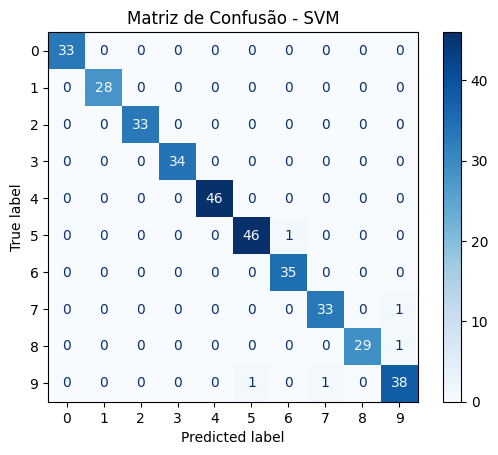

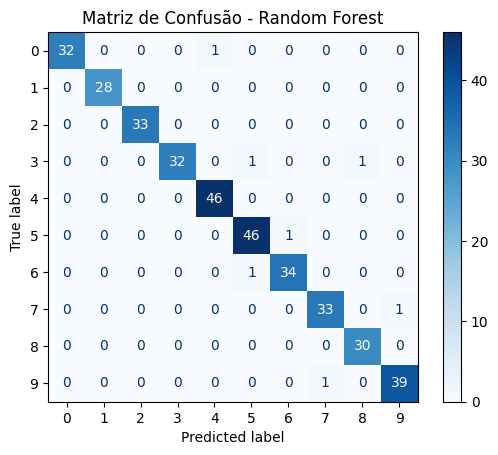

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - SVM")
plt.show()

cm_rf = confusion_matrix(y_test, rf_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=digits.target_names)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Random Forest")
plt.show()

## Salvando os modelos treinados para uso futuro

Após a avaliação, o modelo com melhor desempenho pode ser escolhido para implantação em um ambiente de produção. Iremos fazer em outro código (em breve)

In [11]:
# Salvando os modelos treinados para uso futuro
import joblib
joblib.dump(svm, 'svm_model_digito.pkl')
joblib.dump(rf, 'rf_model_digito.pkl')

['rf_model_digito.pkl']

## Desafio 1


Tente ajustar os hiperparâmetros dos modelos para os algoritmos utilizados e aprimore a performance dos modelo.




In [11]:
# sua resposta aqui...




## Desafio 2

Pesquise sobre outros modelos de classificação e compare-os com os utlizados. 



In [12]:
# sua resposta aqui...